In [2]:
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from keras.callbacks import Callback 
from keras.datasets import mnist  


In [3]:


SEED = 2022  

# Load the MNIST dataset
# Note: Need Internet Connection to download the dataset
(X_train, y_train), (X_val, y_val) = mnist.load_data()


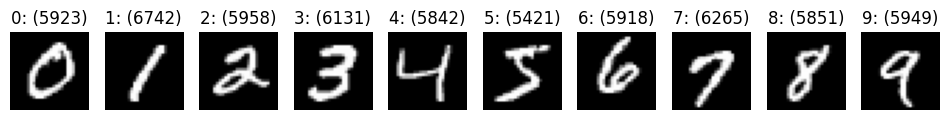

In [4]:


# Show an example of each label and print the count per label
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))
i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()


In [5]:

# Print validation data
print(X_val)
print(y_val)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[7 2 1 ... 4 5 6]


In [6]:


# Preprocess the data
# Normalize data
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

# One-Hot-Encode labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
print(y_train)



[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:


# Flatten data - treat the image as a sequential array of values
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))
print(X_train)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:

# Define the model with the sigmoid activation function
model_sigmoid = Sequential()  
model_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid')) 
model_sigmoid.add(Dense(700, activation='sigmoid')) 
model_sigmoid.add(Dense(700, activation='sigmoid')) 
model_sigmoid.add(Dense(700, activation='sigmoid')) 
model_sigmoid.add(Dense(700, activation='sigmoid'))  
model_sigmoid.add(Dense(350, activation='sigmoid'))  
model_sigmoid.add(Dense(100, activation='sigmoid'))  
model_sigmoid.add(Dense(10, activation='softmax'))  

# Compile model with SGD
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Define the model with the ReLU activation function
model_relu = Sequential() 
model_relu.add(Dense(700, input_dim=784, activation='relu')) 
model_relu.add(Dense(700, activation='relu')) 
model_relu.add(Dense(700, activation='relu')) 
model_relu.add(Dense(700, activation='relu')) 
model_relu.add(Dense(700, activation='relu'))  
model_relu.add(Dense(350, activation='relu'))  
model_relu.add(Dense(100, activation='relu'))  
model_relu.add(Dense(10, activation='softmax'))  

# Compile model with SGD
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 - 7s - 37ms/step - accuracy: 0.1049 - loss: 2.3202 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 2/10
188/188 - 11s - 56ms/step - accuracy: 0.1140 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3019
Epoch 3/10
188/188 - 6s - 33ms/step - accuracy: 0.1140 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3019
Epoch 4/10
188/188 - 7s - 35ms/step - accuracy: 0.1140 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3026
Epoch 5/10
188/188 - 6s - 34ms/step - accuracy: 0.1140 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 6/10
188/188 - 6s - 34ms/step - accuracy: 0.1138 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3026
Epoch 7/10
188/188 - 7s - 35ms/step - accuracy: 0.1140 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 8/10
188/188 - 6s - 34ms/step - accuracy: 0.1140 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 9/10
188/188 - 6s - 34ms/step - accuracy: 0.1140 - loss: 2.3015 - val_accuracy: 0.1060 - val_loss

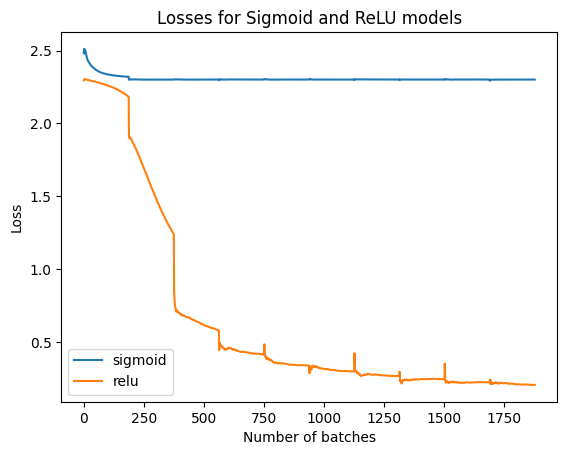

In [9]:


# Create a callback function to store the loss values per batch
class HistoryLoss(Callback):     
    def on_train_begin(self, logs=None):  
        self.losses = []     
    def on_batch_end(self, batch, logs=None):  
        batch_loss = logs.get('loss')         
        self.losses.append(batch_loss) 

n_epochs = 10 
batch_size = 256 
validation_split = 0.2 

history_sigmoid = HistoryLoss()  
model_sigmoid.fit(X_train, y_train, epochs=n_epochs, 
                  batch_size=batch_size, callbacks=[history_sigmoid],  
                  validation_split=validation_split, verbose=2) 

history_relu = HistoryLoss()  
model_relu.fit(X_train, y_train, epochs=n_epochs, 
               batch_size=batch_size, callbacks=[history_relu],  
               validation_split=validation_split, verbose=2) 

# Plot the loss for both models
plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label='sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label='relu')
plt.title('Losses for Sigmoid and ReLU models')
plt.xlabel('Number of batches')
plt.ylabel('Loss')
plt.legend(loc='best')  
plt.show()


In [10]:

# Extract the maximum weights of each model per layer
w_sigmoid = []
w_relu = []
for i in range(len(model_sigmoid.layers)):     
    w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))     
    w_relu.append(max(model_relu.layers[i].get_weights()[1])) 
print(w_sigmoid)
print(w_relu)



[1.5317396e-06, 2.3029668e-06, 7.2006196e-06, 3.8639857e-05, 0.00015048475, 0.00073364185, 0.0034329188, 0.034274325]
[0.023928171, 0.0177034, 0.017257622, 0.01673077, 0.025487952, 0.03456744, 0.04231993, 0.12584004]


In [11]:


print(len(model_sigmoid.layers))



8


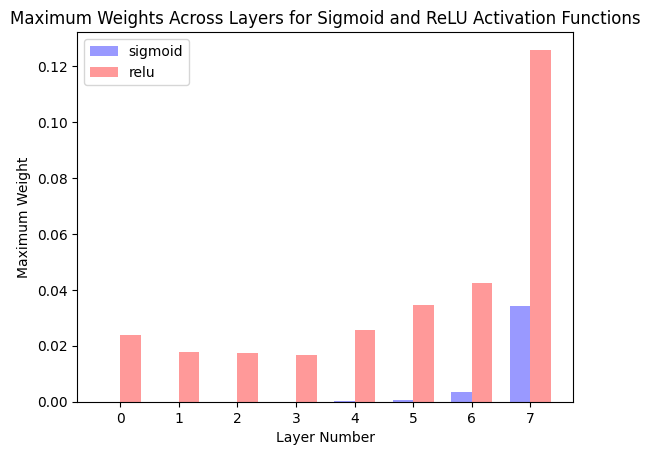

In [12]:

# Plot the weights of both models
fig, ax = plt.subplots()
index = np.arange(len(model_sigmoid.layers))
bar_width = 0.35  

plt.bar(index, w_sigmoid, bar_width, label='sigmoid', color='b', alpha=0.4) 
plt.bar(index + bar_width, w_relu, bar_width, label='relu', color='r', alpha=0.4) 
plt.title('Maximum Weights Across Layers for Sigmoid and ReLU Activation Functions')
plt.xlabel('Layer Number')
plt.ylabel('Maximum Weight')
plt.legend(loc='best')  
plt.xticks(index + bar_width / 2, np.arange(len(model_sigmoid.layers))) 
plt.show()
